In [2]:
#Importing necessary libraries for this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# **Not so flat any more**

You can explore your current working directory natively in Python using the library os, which consists of miscellaneous operating system interfaces.

The first line of the following code imports the library os, the second line stores the name of the current directory in a string called wd and the third outputs the contents of the directory in a list to the shell.


```
import os
wd = os.getcwd()
os.listdir(wd)
```

Run this code in the shell and answer the following questions. Ignore the files that begin with `.`.

Check out the contents of your current directory and answer the following questions: (1) which file is in your directory and NOT an example of a flat file; (2) why is it not a flat file?

**Instructions:**
* A. `database.db` is not a flat file because relational databases contain structured relationships and flat files do not.
* B. `titanic.xlsx` is not a flat because it is a spreadsheet consisting of many sheets, not a single table.
* C. `digits_header.txt` is not a flat file because it is a `.txt`, not a `.csv`.

In [3]:
#Run this codecell before proceeding to the next and see what files are available in the current directory
#Run this codecell before doing your assignment in the following codecell
import urllib.request as request
import pandas as pd
#Prepare a text file
link = "https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/digits_header.txt?raw=True"
file1 = request.urlopen(link)
content =  file1.read().decode(file1.headers.get_content_charset())
with open('digits_header.txt', 'w') as file2:
  file2.write(content)
file1.close()
#Prepare an excel file
df = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/titanic.csv?raw=True')
df.to_excel('titanic.xlsx')


In [4]:
import os
wd = os.getcwd()
os.listdir(wd)

['.config', 'digits_header.txt', 'titanic.xlsx', 'sample_data']

In [5]:
#Print either A, B or C of your choice for the question after running the two previous codecells
print('c')

c


# **Loading a pickled file**

There are a number of datatypes that cannot be saved easily to flat files, such as lists and dictionaries. If you want your files to be human readable, you may want to save them as text files in a clever manner. JSONs, for example, are appropriate for Python dictionaries.

However, if you merely want to be able to import them into Python, you can serialize them. All this means is converting the object into a sequence of bytes, or a bytestream.

In this exercise, you'll import the pickle package, open a previously pickled data structure from a file and load it.

**Instructions:**
* Import the pickle package.
* Complete the second argument of `open()` so that it is read only for a binary file. This argument will be a string of two letters, one signifying `'read only'`, the other `'binary'`.
* Pass the correct argument to `pickle.load()`; it should use the variable that is bound to open.
* Print the data, `d`.
* Print the datatype of `d`; take your mind back to your previous use of the function `type()`.


In [6]:
#Run this codecell before the next codecell
data_dict = {'June': '69.4', 'Aug': '85', 'Airline': '8', 'Mar': '84.4'}
import pickle
with open('data.pkl', 'wb') as file:
    pickle.dump(data_dict, file)

In [7]:
# Import pickle package
import pickle

# Open the pickled file in read-only binary mode
with open('data.pkl', 'rb') as file:  # 'rb' stands for read binary
    # Load the pickled data
    d = pickle.load(file)

# Print the data
print("Data:", d)

# Print the datatype of the data
print("Datatype:", type(d))



Data: {'June': '69.4', 'Aug': '85', 'Airline': '8', 'Mar': '84.4'}
Datatype: <class 'dict'>


In [8]:
import pandas as pd

# Assign spreadsheet filename: file
file = 'https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/battledeath.xlsx?raw=True'

# Load spreadsheet: xls
xls = pd.ExcelFile(file)

# Print sheet names
print(xls.sheet_names)



['2002', '2004']


# **Listing sheets in Excel files**

Whether you like it or not, any working data scientist will need to deal with Excel spreadsheets at some point in time. You won't always want to do so in Excel, however!

Here, you'll learn how to use pandas to import Excel spreadsheets and how to list the names of the sheets in any loaded `.xlsx` file.

Recall from the class that, given an Excel file imported into a variable spreadsheet, you can retrieve a list of the sheet names using the attribute `spreadsheet.sheet_names`.

Specifically, you'll be loading and checking out the spreadsheet `'battledeath.xlsx'`, modified from the Peace Research Institute Oslo's (PRIO) dataset. This data contains age-adjusted mortality rates due to war in various countries over several years.

**Instructions:**
* Assign the spreadsheet filename (provided above) to the variable `file`.
* Pass the correct argument to `pd.ExcelFile()` to load the file using pandas, assigning the result to the variable `xls`.
* Print the sheetnames of the Excel spreadsheet by passing the necessary argument to the `print()` function.


# **Importing sheets from Excel files**

In the previous exercises, you saw that the Excel file contains two sheets, `'2002'` and `'2004'`. The next step is to import these.

In this exercise, you'll learn how to import any given sheet of your loaded .xlsx file as a DataFrame. You'll be able to do so by specifying either the sheet's name or its index.

The spreadsheet `'battledeath.xlsx'` is already loaded as `xls` in the previous codecell.

**Instructions:**
* Load the sheet `'2004'` into the DataFrame `df1` using its name as a string.
* Print the head of `df1`.
* Load the sheet `'2002'` into the DataFrame `df2` using its index (`0`).
* Print the head of `df2`.


In [9]:
# Load the sheet '2004' into a DataFrame using its name
df1 = xls.parse('2004')

# Print the head of df1
print("Head of sheet '2004':")
print(df1.head())

# Load the sheet '2002' into a DataFrame using its index
df2 = xls.parse(0)

# Print the head of df2
print("\nHead of sheet '2002':")
print(df2.head())





Head of sheet '2004':
  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931

Head of sheet '2002':
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


In [10]:
df1 = xls.parse(
    sheet_name=0,  # First sheet by index
    skiprows=[0],  # Skip the first row
    names=['Country', 'AAM due to War (2002)']  # Rename columns
)

# Print the head of df1
print("Parsed sheet 0 with custom settings:")
print(df1.head())

# Parse the second sheet (index 1)
df2 = xls.parse(
    sheet_name=1,  # Second sheet by index
    usecols=[0],  # Parse only the first column
    skiprows=[0],  # Skip the first row
    names=['Country']  # Rename column
)

# Print the head of df2
print("\nParsed sheet 1 with custom settings:")
print(df2.head())




Parsed sheet 0 with custom settings:
               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000

Parsed sheet 1 with custom settings:
               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


# **Customizing your spreadsheet import**

Here, you'll parse your spreadsheets and use additional arguments to skip rows, rename columns and select only particular columns.

The spreadsheet `'battledeath.xlsx'` is already loaded as `xls`.

As before, you'll use the method p`arse()`. This time, however, you'll add the additional arguments `skiprows`, names and `usecols`. These skip rows, name the columns and designate which columns to parse, respectively. All these arguments can be assigned to lists containing the specific row numbers, strings and column numbers, as appropriate.

**Instructions:**
* Parse the first sheet by index. In doing so, skip the first row of data and name the columns `'Country'` and `'AAM due to War (2002)'` using the argument names. The values passed to `skiprows` and `names` all need to be of type list.
* Parse the second sheet by index. In doing so, parse only the first column with the `usecols` parameter, skip the first row and rename the column `'Country'`. The argument passed to `usecols` also needs to be of type list.


# **Importing SAS files**

In this exercise, you'll figure out how to import a SAS file as a DataFrame using SAS7BDAT and pandas. The file `'sales.sas7bdat'` is already in your working directory and both `pandas` and `matplotlib.pyplot` have already been imported as follows:
```
import pandas as pd
import matplotlib.pyplot as plt
```

The data are adapted from the website of the undergraduate text book Principles of Econometrics by Hill, Griffiths and Lim.

**Instructions:**
* Import the module `SAS7BDAT` from the library `sas7bdat`.
* In the context of the file `'sales.sas7bdat'`, load its contents to a DataFrame `df_sas`, using the method `.to_data_frame()` on the object file.
* Print the head of the DataFrame `df_sas`.
* Execute your entire script to produce a histogram plot!


In [12]:
#Run this pip installation before proceeding to the following codecell
!pip install sas7bdat

  Preparing metadata (setup.py) ... done
  Created wheel for sas7bdat: filename=sas7bdat-2.2.3-py3-none-any.whl size=16291 sha256=3ac19bf318fb80c74b63d5e4a57d5894e42363ec92b0a9bbed62e875d098f83e
  Stored in directory: /root/.cache/pip/wheels/d2/ad/aa/badcd17bd07e0df1adfc85e738acc942787648fb7ed4044543
Successfully built sas7bdat


     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


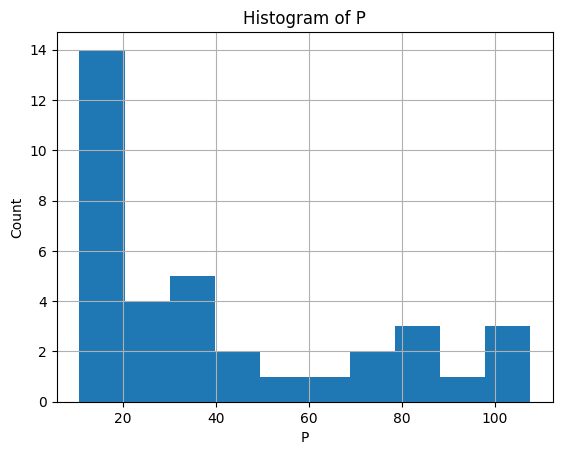

In [13]:
# Import necessary libraries
from sas7bdat import SAS7BDAT
import pandas as pd
import matplotlib.pyplot as plt
import requests

# The file location as file_path (remote URL)
url = 'https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/sales.sas7bdat?raw=True'

# Download the file to a local temporary file
local_file_path = 'sales.sas7bdat'
response = requests.get(url)
with open(local_file_path, 'wb') as file:
    file.write(response.content)

# Load the SAS file into a DataFrame
with SAS7BDAT(local_file_path) as file:
    df_sas = file.to_data_frame()

# Print head of the DataFrame
print(df_sas.head())

# Plot histogram of the 'P' column
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('Count')
plt.xlabel('P')
plt.title('Histogram of P')
plt.show()

# **Importing Stata files**

Here, you'll gain expertise in importing Stata files as DataFrames using the `pd.read_stata()` function from pandas. The last exercise's file, `'disarea.dta'`, whose link is given as `file_path`.

**Instructions:**
* Use `pd.read_stata()` to load the file `'disarea.dta'` into the DataFrame `df`.
* Print the head of the DataFrame `df`.
* Visualize your results by plotting a histogram of the column `disa10`. The code for visualization is proviced to you, so just run it!


  wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8  ...  disa16  disa17  disa18  disa19  disa20  disa21  disa22  \
0   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
1   0.56    0.0  ...     0.0     0.4     0.0    0.61    0.00     0.0    0.99   
2   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
3   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
4   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.05     0.0    0.00   

   disa23  disa24  disa25  
0    0.02    0.00    0.00  
1    0

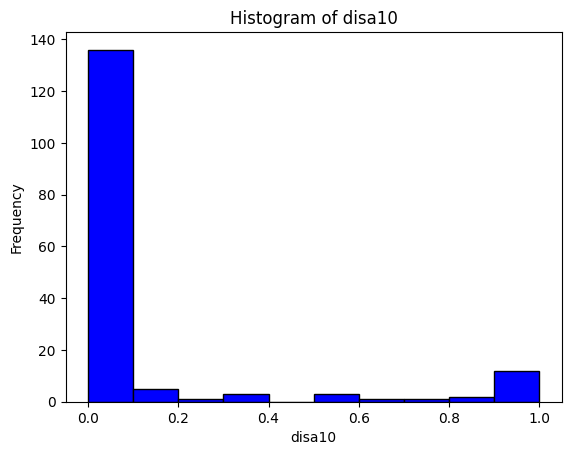

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# The file location as file_path
file_path = 'https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/disarea.dta?raw=True'

# Load the Stata file into a DataFrame
df = pd.read_stata(file_path)

# Print the head of the DataFrame
print(df.head())

# Plot a histogram of the column disa10
df['disa10'].plot(kind='hist', bins=10, color='blue', edgecolor='black')
plt.xlabel('disa10')
plt.ylabel('Frequency')
plt.title('Histogram of disa10')
plt.show()



In [16]:
# Import necessary libraries
import h5py
import requests

# Define the file URL
file_url = 'https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/LIGO_data.hdf5?raw=True'

# Define the local file path to save the downloaded file
local_file = 'LIGO_data.hdf5'

# Download the file
response = requests.get(file_url)
with open(local_file, 'wb') as f:
    f.write(response.content)

# Load the HDF5 file as read-only
with h5py.File(local_file, 'r') as data:
    # Print the datatype of the data object
    print(f"Data type of the file: {type(data)}")

    # Print the names of the groups in the HDF5 file
    print("Groups in the HDF5 file:")
    for group in data.keys():
        print(group)







Data type of the file: <class 'h5py._hl.files.File'>
Groups in the HDF5 file:
meta
quality
strain


# Import necessary libraries
import h5py
import requests

# Define the file URL
file_url = 'https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/LIGO_data.hdf5?raw=True'

# Define the local file path to save the downloaded file
local_file = 'LIGO_data.hdf5'

# Download the file
response = requests.get(file_url)
with open(local_file, 'wb') as f:
    f.write(response.content)

# Load the HDF5 file as read-only
with h5py.File(local_file, 'r') as data:
    # Print the datatype of the data object
    print(f"Data type of the file: {type(data)}")
    
    # Print the names of the groups in the HDF5 file
    print("Groups in the HDF5 file:")
    for group in data.keys():
        print(group# **Using h5py to import HDF5 files**

The file `'LIGO_data.hdf5'`, whose link is provided as `file_path` string variable, is available to use. In this exercise, you'll import it using the h5py library. You'll also print out its datatype to confirm you have imported it correctly. You'll then study the structure of the file in order to see precisely what HDF groups it contains.

You can find the LIGO data plus loads of documentation and tutorials [here](https://gwosc.org/events/GW150914/). There is also a great tutorial on Signal Processing with the data [here](https://gwosc.org/GW150914data/LOSC_Event_tutorial_GW150914.html).

**Instructions:**
* Import the package `h5py`.
* Assign the name of the file to the variable `file`.
* Load the file as read only into the variable `data`.
* Print the datatype of `data`.
* Print the names of the groups in the HDF5 file `'LIGO_data.hdf5'`.


# **Extracting data from your HDF5 file**

In this exercise, you'll extract some of the LIGO experiment's actual data from the HDF5 file and you'll visualize it.

To do so, you'll need to first explore the HDF5 group `'strain'`.

**Instructions:**
* Assign the HDF5 group `data['strain']` to `group`.
* In the for loop, print out the keys of the HDF5 group in `group`.
* Assign the time series data `data['strain']['Strain']` to a NumPy array called `strain`.
* Set `num_samples` equal to `10000`, the number of time points we wish to sample.
* Execute the rest of the code to produce a plot of the time series data in `LIGO_data.hdf5`.


Keys in the 'strain' group:
Strain


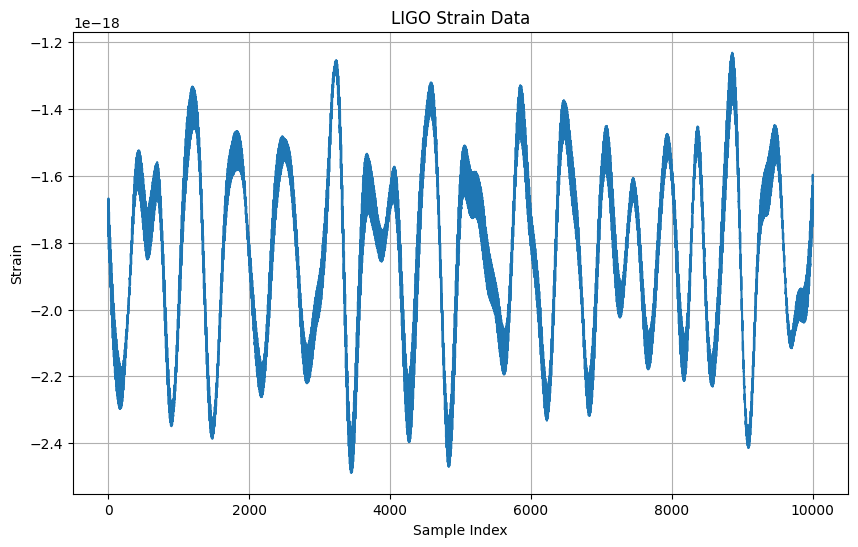

In [17]:
# Import necessary libraries
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Define the local file path for the HDF5 file
file_path = 'LIGO_data.hdf5'

# Open the HDF5 file as read-only
with h5py.File(file_path, 'r') as data:
    # Assign the 'strain' group to the variable group
    group = data['strain']

    # Print the keys in the 'strain' group
    print("Keys in the 'strain' group:")
    for key in group.keys():
        print(key)

    # Assign the time series data 'Strain' to a NumPy array
    strain = np.array(group['Strain'])

    # Set the number of samples to 10,000
    num_samples = 10000

    # Extract the first 10,000 samples for visualization
    strain_sample = strain[:num_samples]

    # Plot the time series data
    plt.figure(figsize=(10, 6))
    plt.plot(strain_sample)
    plt.title('LIGO Strain Data')
    plt.xlabel('Sample Index')
    plt.ylabel('Strain')
    plt.grid()
    plt.show()# Get the HDF5 group: group





# **Loading `.mat` files**

In this exercise, you'll figure out how to load a MATLAB file using `scipy.io.loadmat()` and you'll discover what Python datatype it yields.

The link to a file `'albeck_gene_expression.mat'` is given as `file_path` string variable. This file contains gene expression data from the Albeck Lab at UC Davis.

**Instructions:**
* Import the package `scipy.io`.
* Load the file `'albeck_gene_expression.mat'` into the variable `mat`; do so using the function `scipy.io.loadmat()`.
* Use the function `type()` to print the datatype of `mat` to the shell.



In [22]:
import requests
from scipy.io import loadmat

# URL of the .mat file
file_url = 'https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/albeck_gene_expression.mat?raw=True'

# Download the .mat file
response = requests.get(file_url)

# Save the content as a local file
with open('albeck_gene_expression.mat', 'wb') as f:
    f.write(response.content)

# Now load the .mat file using scipy.io.loadmat
mat = loadmat('albeck_gene_expression.mat')

# Print the datatype of mat
print(f"Data type of mat: {type(mat)}")




Data type of mat: <class 'dict'>


import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Define the file path
file_path = 'https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/albeck_gene_expression.mat?raw=True'

# Load the .mat file
mat = scipy.io.loadmat(file_path)

# Print the keys of the dictionary
print("Keys in the MATLAB dictionary:", mat.keys())

# Access and inspect the 'CYratioCyt' key
cy_ratio_cyt = mat['CYratioCyt']

# Print the type of the value corresponding to 'CYratioCyt'
print("Type of 'CYratioCyt':", type(cy_ratio_cyt))

# Print the shape of the value corresponding to 'CYratioCyt'
print("Shape of 'CYratioCyt':", np.shape(cy_ratio_cyt))

# Visualize the oscillatory gene expression data
plt.plot(cy_ratio_cyt[:, 0])  # Plot the first column
plt.title("Oscillatory Gene Expression Data")
plt.xlabel("Time Points")
plt.ylabel("Gene Expression Level")
plt.show()# **The structure of `.mat `in Python**

Here, you'll discover what is in the MATLAB dictionary that you loaded in the previous exercise.

The file `'albeck_gene_expression.mat'` is already loaded into the variable `mat`. The following libraries have already been imported as follows:

import scipy.io
import matplotlib.pyplot as plt
import numpy as np

Once again, this file contains gene expression data from the Albeck Lab at UCDavis.

**Instructions:**
* Use the method `.keys()` on the dictionary `mat` to print the keys. Most of these keys (in fact the ones that do NOT begin and end with `'__'`) are variables from the corresponding MATLAB environment.
* Print the type of the value corresponding to the key `'CYratioCyt'` in `mat`. Recall that `mat['CYratioCyt']` accesses the value.
* Print the shape of the value corresponding to the key `'CYratioCyt'` using the numpy function `shape()`.
* Execute the entire script to see some oscillatory gene expression data!


Keys in the MATLAB dictionary: dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])
Type of 'CYratioCyt': <class 'numpy.ndarray'>
Shape of 'CYratioCyt': (200, 137)


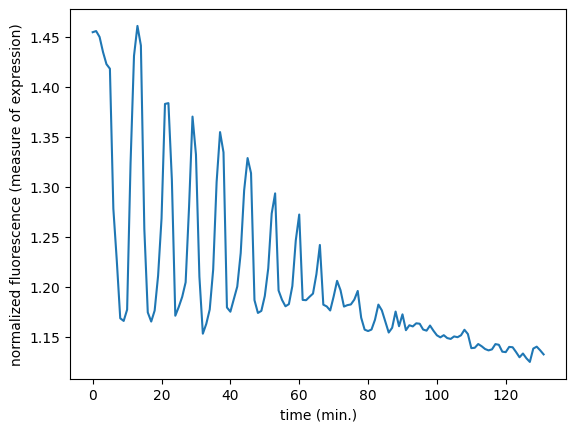

In [27]:
import requests
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
# URL of the .mat file
file_url = 'https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/albeck_gene_expression.mat?raw=True'

# Download the .mat file
response = requests.get(file_url)



# Save the content as a local file
file_path = 'albeck_gene_expression.mat'
with open('albeck_gene_expression.mat', 'wb') as f:
    f.write(response.content)



# Load the .mat file
mat = scipy.io.loadmat(file_path)

# Print the keys of the dictionary
print("Keys in the MATLAB dictionary:", mat.keys())

# Access and inspect the 'CYratioCyt' key
cy_ratio_cyt = mat['CYratioCyt']

# Print the type of the value corresponding to 'CYratioCyt'
print("Type of 'CYratioCyt':", type(cy_ratio_cyt))

# Print the shape of the value corresponding to 'CYratioCyt'
print("Shape of 'CYratioCyt':", np.shape(cy_ratio_cyt))

# Subset the array and plot it
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()
